## Positionnement des lames

on définit des configurations pour la position des lames

<!-- TEASER_END -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig_width = 13

In [2]:
N_lame = 8**2
# on définit l'ensemble des lames comme un tableau de (x, y, theta) x N_lame
lames = np.ones((3, N_lame))

### grille rectangulaire

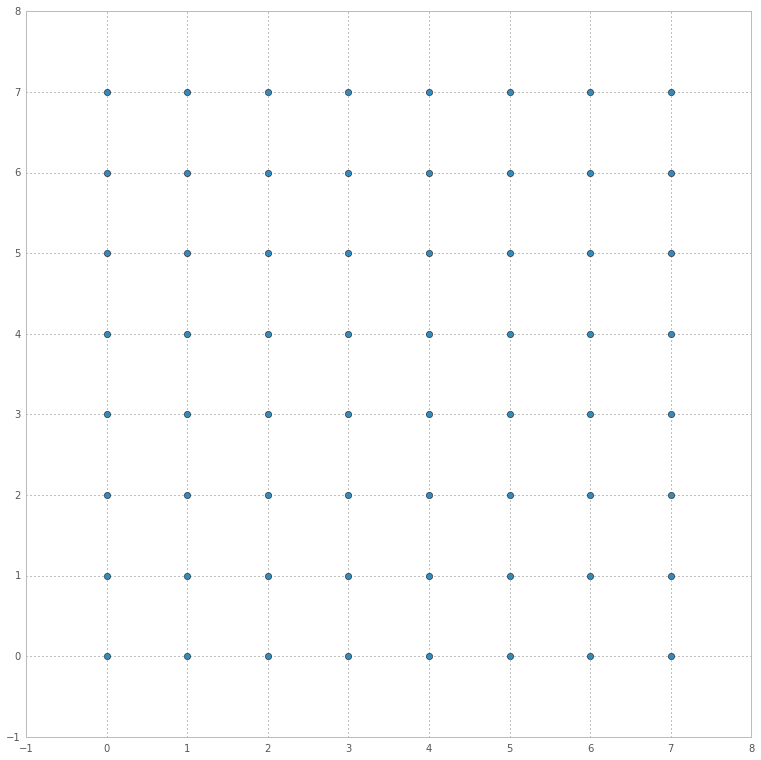

In [3]:
N_lame_X = np.sqrt(N_lame)

lames[0, :] = np.mod(np.arange(N_lame), N_lame_X)
lames[1, :] = np.floor(np.arange(N_lame)/N_lame_X)

fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
_ = ax.plot(lames[0, :], lames[1, :], 'o')
_ = plt.axis([-1, 8, -1., 8])

### grille hexagonale

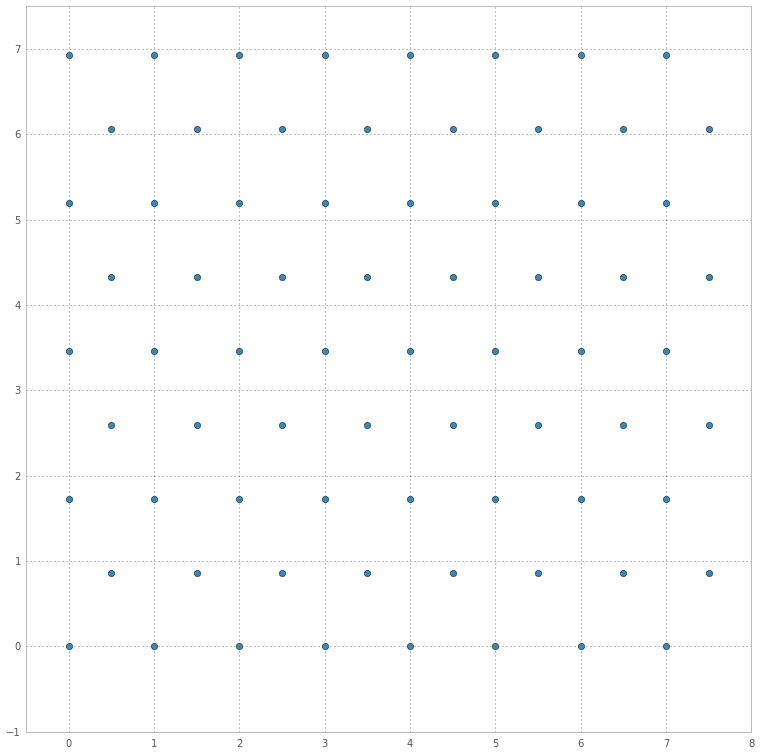

In [4]:
N_lame = 72
# on définit l'ensemble des lames comme un tableau de (x, y, theta) x N_lame
lames = np.ones((3, N_lame))
N_lame_X = np.sqrt(N_lame)#/(np.sqrt(3)/2)
N_lame_X = np.int(N_lame_X)

lames[0, :] = np.mod(np.arange(N_lame), N_lame_X) + np.mod(np.floor(np.arange(N_lame)/N_lame_X), 2)/2 
lames[1, :] = np.floor(np.arange(N_lame)/N_lame_X) 
lames[1, :] *= np.sqrt(3)/2

fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.plot(lames[0, :], lames[1, :], 'o')
_ = plt.axis([-.5, 8, -1., 7.5])

voir http://stackoverflow.com/questions/2459402/hexagonal-grid-coordinates-to-pixel-coordinates#2459541

## ajout d'un champ d'orientations

### orientations aléatoires

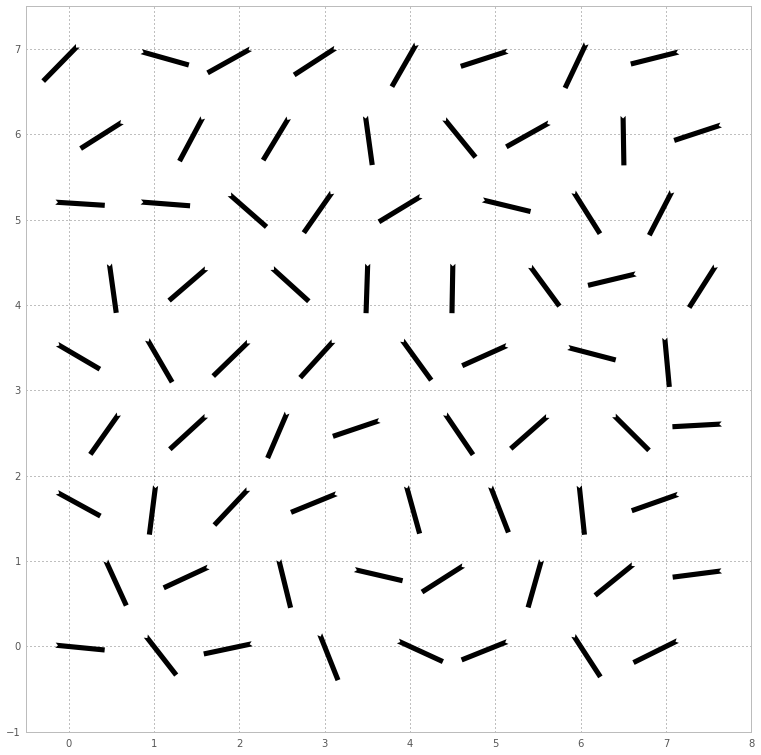

In [5]:
lames[2, :] = np.pi*np.random.rand(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

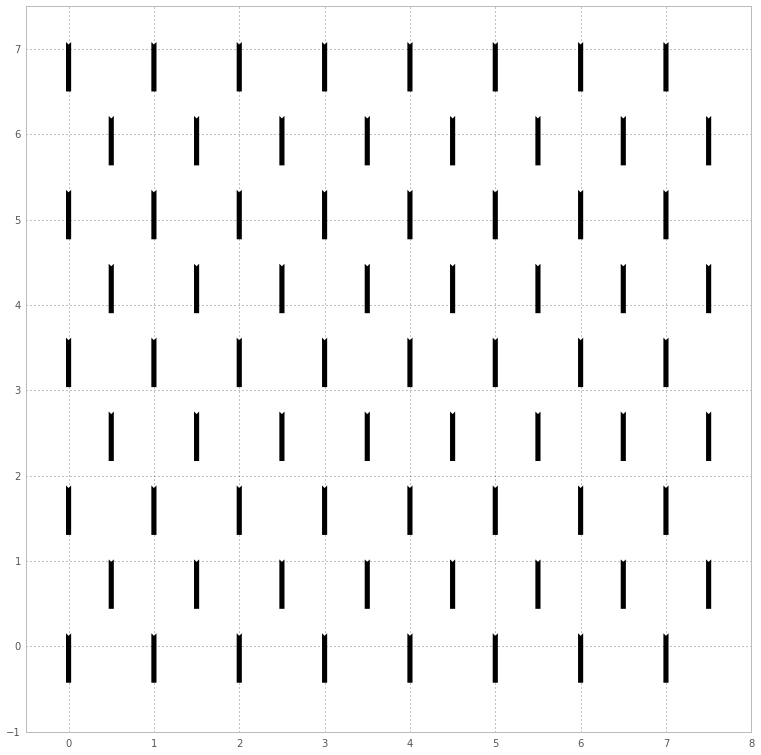

In [6]:
lames[2, :] = np.pi/2
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

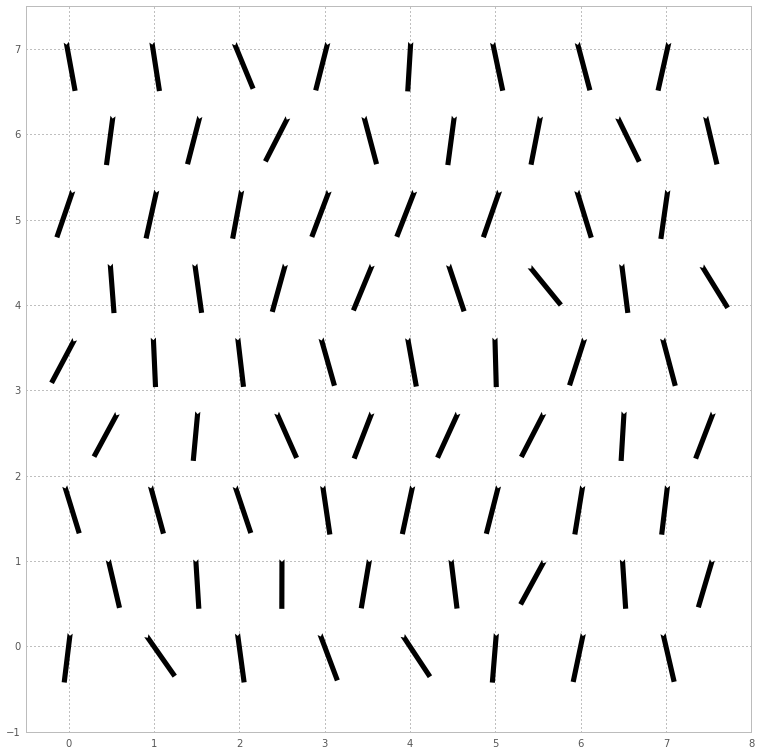

In [7]:
lames[2, :] = np.pi/2 + .1*np.pi*np.random.randn(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

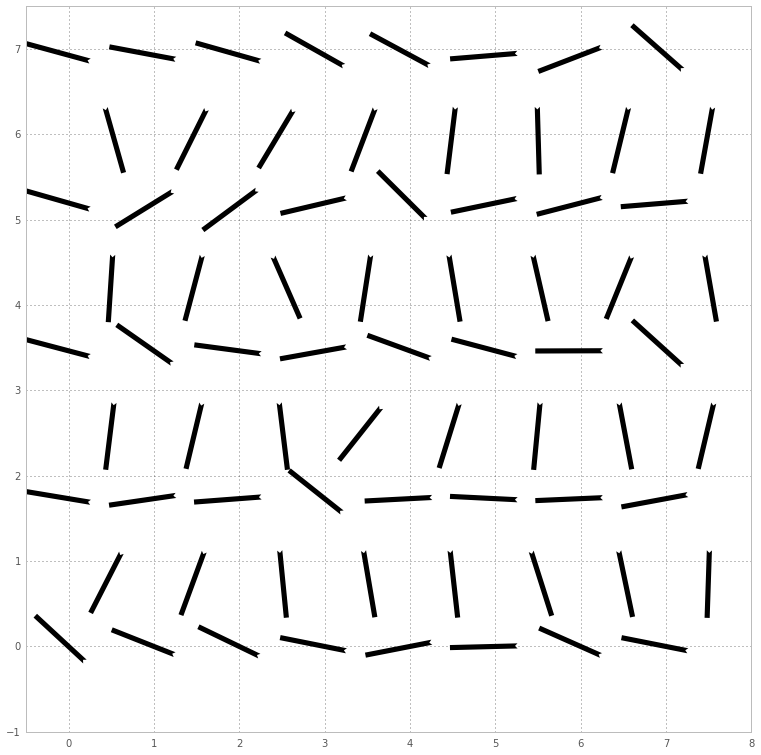

In [8]:
lames[2, :] = np.pi/2*np.mod(np.floor(np.arange(N_lame)/N_lame_X), 2) + .1*np.pi*np.random.randn(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 8, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

## Synthèse : crétion d'un classe

In [9]:
%%writefile /tmp/EdgeGrid.py
import numpy as np
import matplotlib.pyplot as plt

class EdgeGrid():
    def __init__(self):

        self.figsize = 13
        self.line_width = 4.
        
        self.N_lame = 72
        self.N_lame_X = np.int(np.sqrt(self.N_lame))#*np.sqrt(3) / 2)
        
        self.lames = np.zeros((3, self.N_lame))
        self.lames[0, :] = np.mod(np.arange(self.N_lame), self.N_lame_X) 
        self.lames[0, :] += np.mod(np.floor(np.arange(self.N_lame)/self.N_lame_X), 2)/2 
        self.lames[1, :] = np.floor(np.arange(self.N_lame)/self.N_lame_X) 
        self.lames[1, :] *= np.sqrt(3) / 2
        self.lames[0, :] /= self.N_lame_X
        self.lames[1, :] /= self.N_lame_X

        self.lames_minmax = np.array([self.lames[0, :].min(), self.lames[0, :].max(), self.lames[1, :].min(), self.lames[1, :].max()])
        self.lame_length = .45/self.N_lame_X
        

    def show_edges(self, fig=None, a=None):
        """
        Shows the quiver plot of a set of edges, optionally associated to an image.

        """
        import pylab
        import matplotlib.cm as cm
        if fig==None:
            fig = pylab.figure(figsize=(self.figsize, self.figsize))
        if a==None:
            border = 0.0
            a = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
            self.lines = self.set_lines()
            a.add_collection(self.lines)
            a.axis(c='b', lw=0)

            pylab.setp(a, xticks=[])
            pylab.setp(a, yticks=[])

            marge = self.lame_length*3.
            a.axis(self.lames_minmax + np.array([-marge, +marge, -marge, +marge]))
        else:
            self.update_lines()
        pylab.draw()
        return fig, a

    def set_lines(self):
        from matplotlib.collections import LineCollection
        import matplotlib.patches as patches
        # draw the segments
        segments, colors, linewidths = list(), list(), list()

        X, Y, Theta = self.lames[0, :], self.lames[1, :].real, self.lames[2, :]
        for x, y, theta in zip(X, Y, Theta):
            u_, v_ = np.cos(theta)*self.lame_length, np.sin(theta)*self.lame_length
            segments.append([(x - u_, y - v_), (x + u_, y + v_)])
            colors.append((0, 0, 0, 1))# black
            linewidths.append(self.line_width)
        return LineCollection(segments, linewidths=linewidths, colors=colors, linestyles='solid')

    def update_lines(self):
        from matplotlib.collections import LineCollection
        import matplotlib.patches as patches
        X, Y, Theta = self.lames[0, :], self.lames[1, :], self.lames[2, :]
        segments = list()
        for i, (x, y, theta) in enumerate(zip(X, Y, Theta)):
            u_, v_ = np.cos(theta)*self.lame_length, np.sin(theta)*self.lame_length
            segments.append([(x - u_, y - v_), (x + u_, y + v_)])
        self.lines.set_segments(segments)
  


Overwriting /tmp/EdgeGrid.py


In [10]:
%run /tmp/EdgeGrid.py
       
e = EdgeGrid()

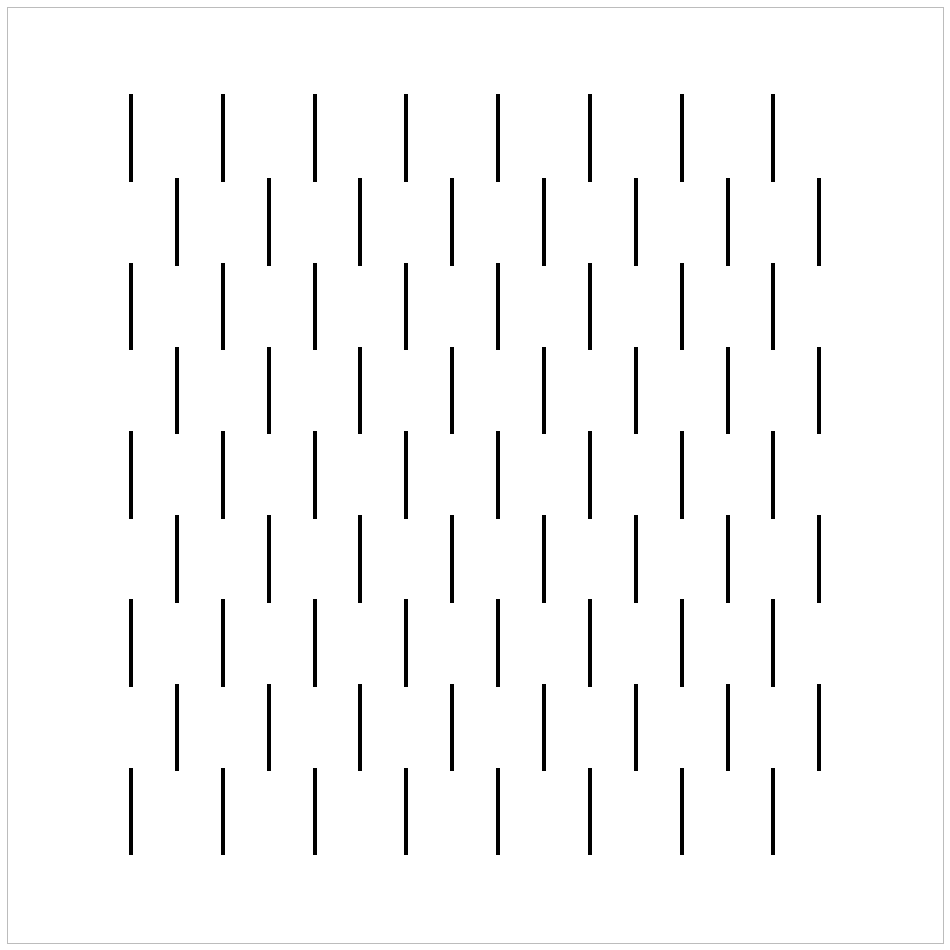

In [11]:
e.lames[2, :] = np.pi/2 
_ = e.show_edges()

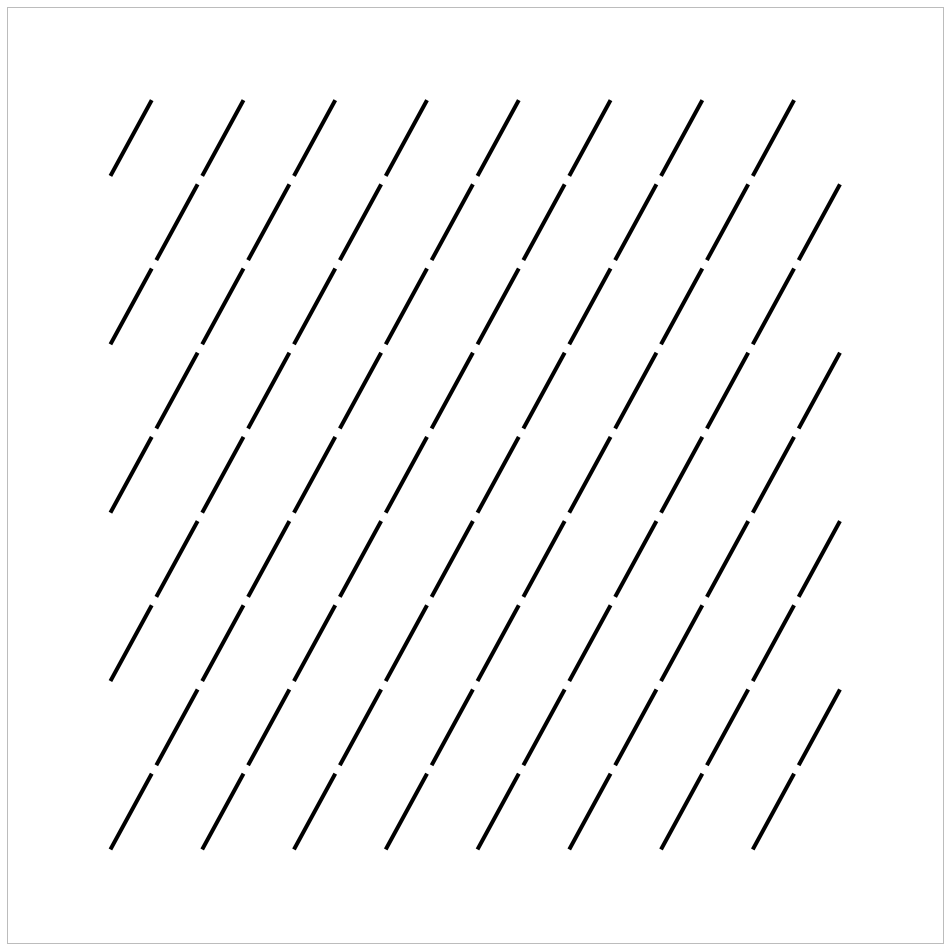

In [12]:
e.lames[2, :] = np.pi/3
_ = e.show_edges()

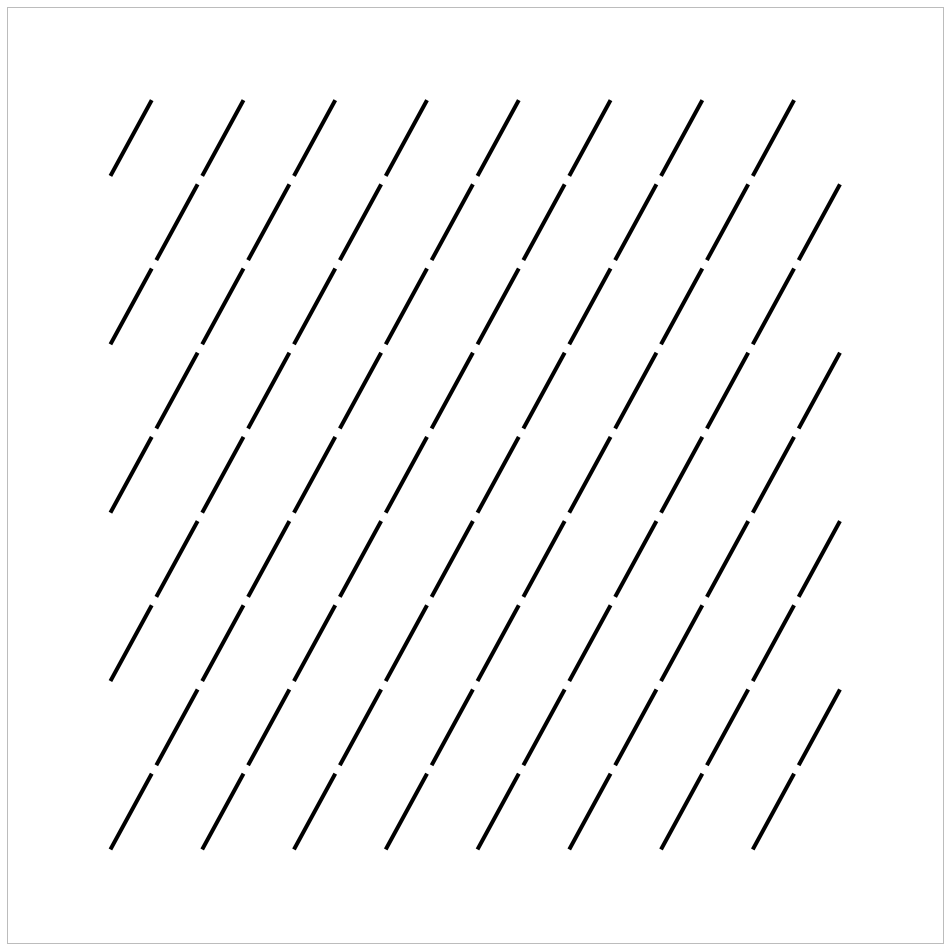

In [13]:
e.lames[2, :] = np.pi/3 
_ = e.show_edges()

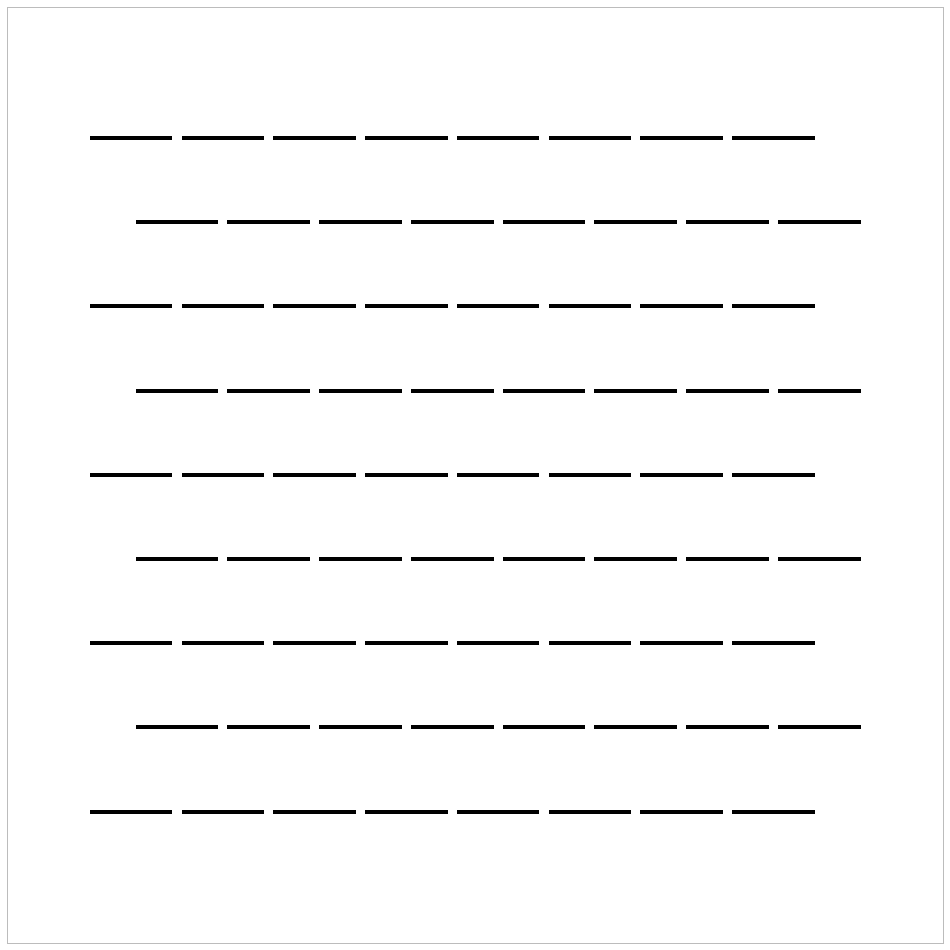

In [14]:
e.lames[2, :] = 0. 
_ = e.show_edges()

The coordinates coorrespond to:
- the first column (X axis) correspond to horizontal
- the second column (Y axis) to vertical
Coordinates are between zero (left or bottom) to one (right or top)

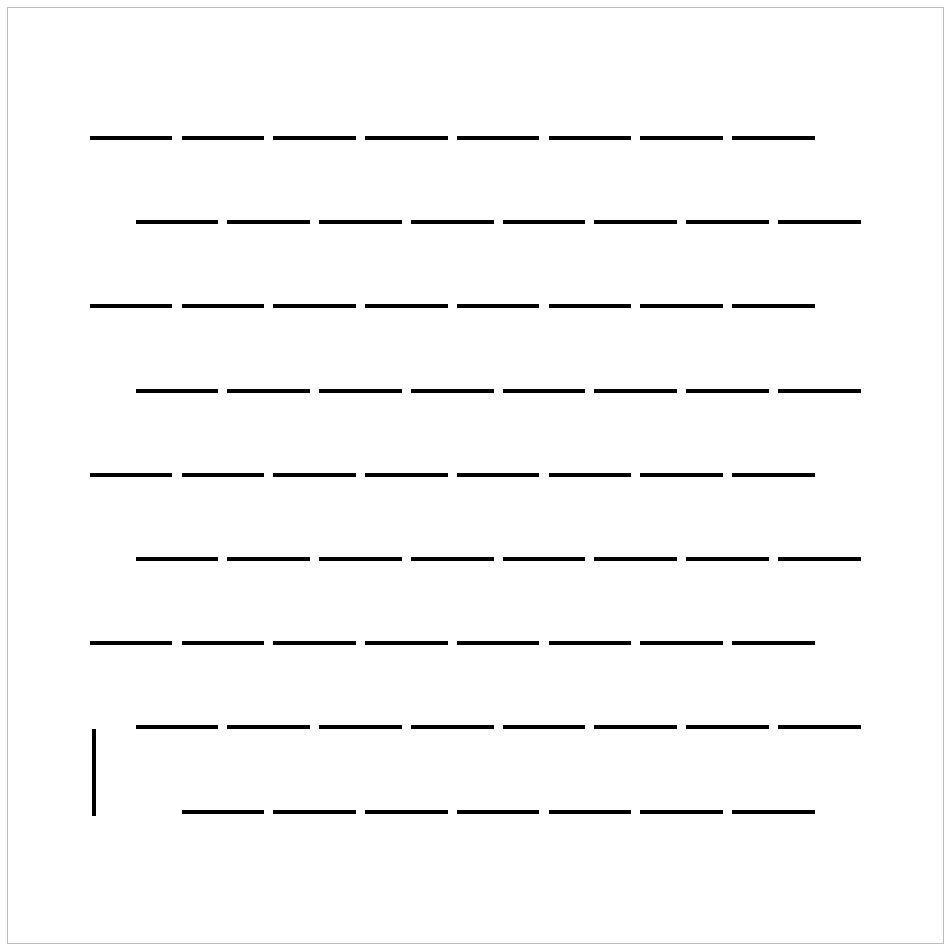

In [15]:
import numpy as np
e.lames[0, 0] = -0.05
e.lames[1, 0] = 0.05
e.lames[2, 0] = np.pi/2 
_ = e.show_edges()

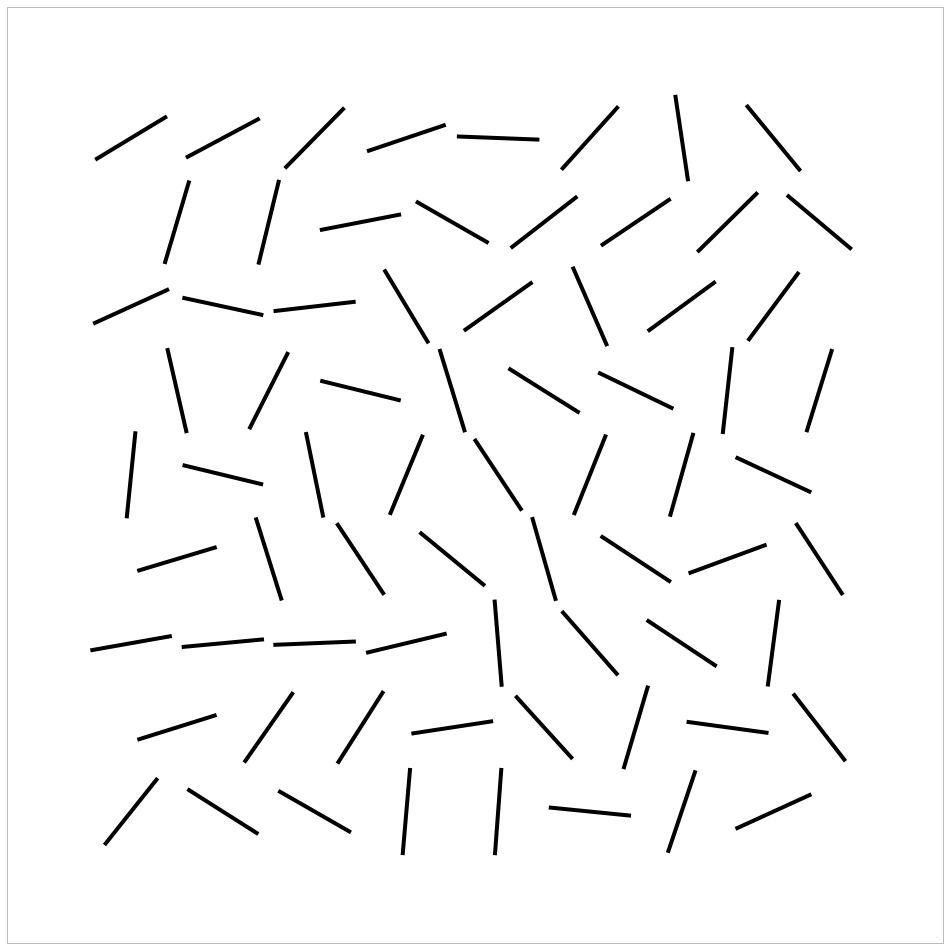

In [18]:
e = EdgeGrid()
e.lames[2, :] = np.pi*np.random.rand(e.N_lame)
_ = e.show_edges()

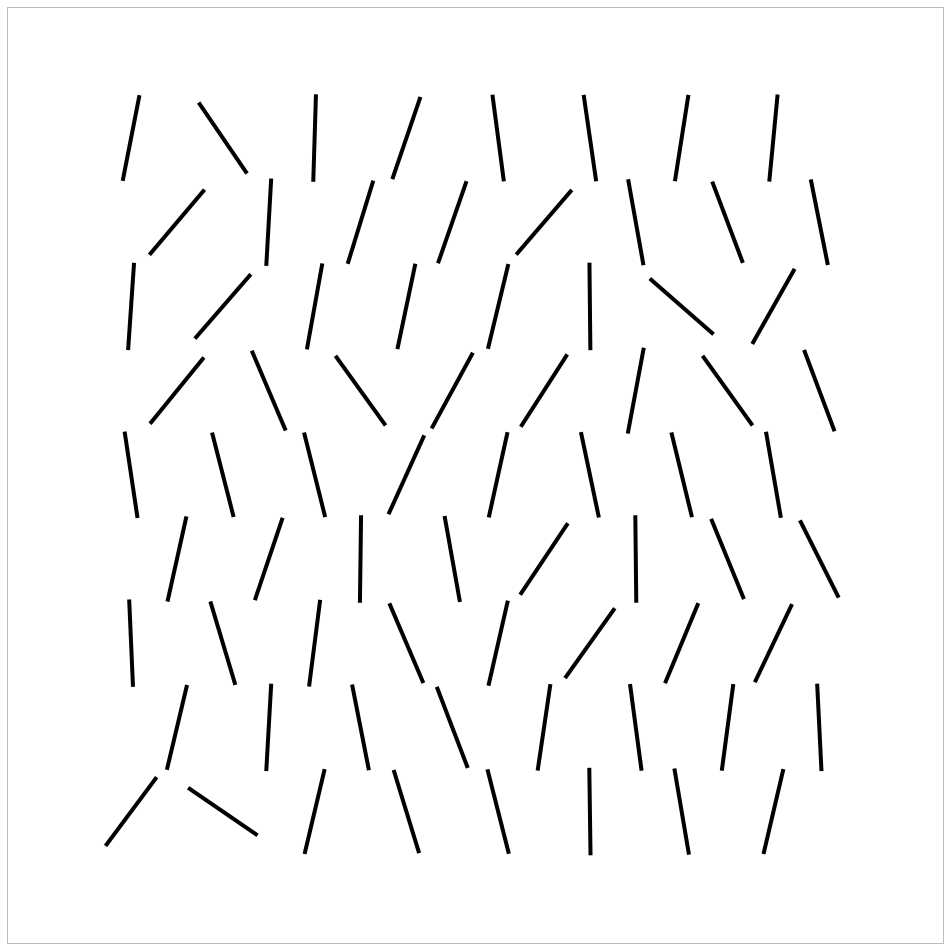

In [19]:
e.lames[2, :] = np.pi/2 + .1*np.pi*np.random.randn(e.N_lame)
_ = e.show_edges()